In [1]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/60/bf/70efe5138327c7ccf34f0a870ac97d41d3c06fecb2ec8dc2060ff39aadc9/yfinance-0.2.30-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.30-py2.py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-py311-none-any.whl (14 kB)
  Using cached peewee-3.16.3-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached yfinance-0.2.30-py2.py3-none-any.whl (65 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


Final Portfolio Value for SPY: $0.00
Final Cash Value: $0.00


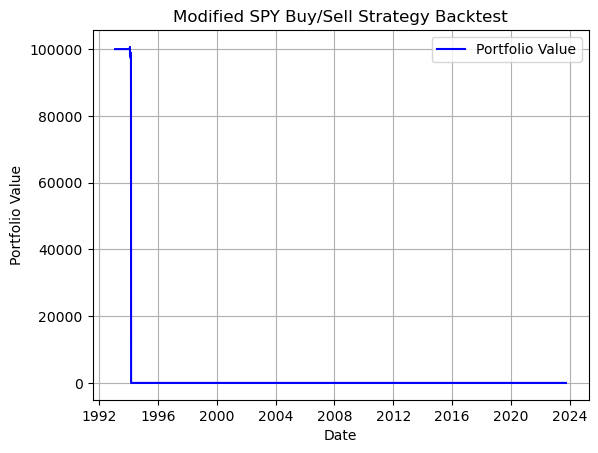

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical price data for SPY (S&P 500 ETF)
spyticker = yf.Ticker("SPY")
data = spyticker.history(period="max", interval="1d", start="1988-12-01", end="2024-01-01")

# Create a DataFrame from the SPY data
df = pd.DataFrame(data)
df.index = pd.to_datetime(df.index)  # Convert the index to datetime
df.index.name = 'Date'  # Set the name of the index to 'Date'

# Define a function to perform the modified backtest
def backtest_strategy(df):
    # Initial parameters
    initial_cash = 100000
    cash = initial_cash
    position = 0
    portfolio_value = []

    # Check the column names in the DataFrame
    if 'Close' in df.columns:
        close_column = 'Close'
    elif 'Close' in df.columns:
        close_column = 'Close'
    else:
        raise ValueError("No 'Close' column found in the DataFrame.")

    # Loop through the data
    for date, row in df.iterrows():
        # Check if it's the first day of the month
        if date.day == 1:
            # Calculate the date one year ago
            one_year_ago_date = date - pd.DateOffset(years=1)

            # Get the price one year ago (if available)
            if one_year_ago_date in df.index:
                price_one_year_ago = df.loc[one_year_ago_date, close_column]
            else:
                price_one_year_ago = row[close_column]  # Use current price if data is missing

            # Check if the price is higher than one year ago and make a decision
            if row[close_column] > price_one_year_ago:
                # Buy SPY
                position = cash / row[close_column]
                cash = 0
            else:
                # Sell SPY and go to cash
                cash += position * row[close_column]
                position = 0            
        # Calculate the total portfolio value at the end of each day
        total_value = cash + position * row[close_column]
        portfolio_value.append(total_value)

    return portfolio_value, cash

# Run the modified backtest with the SPY data
portfolio_value, final_cash = backtest_strategy(df)

# Print the final portfolio value and cash value
print(f"Final Portfolio Value for SPY: ${portfolio_value[-1]:.2f}")
print(f"Final Cash Value: ${final_cash:.2f}")

# Plot the portfolio value over time
plt.plot(df.index, portfolio_value, label='Portfolio Value', color='blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Modified SPY Buy/Sell Strategy Backtest')
plt.legend()
plt.grid(True)
plt.show()

Final Portfolio Value for SPY: $0.00
Final Cash Value: $0.00


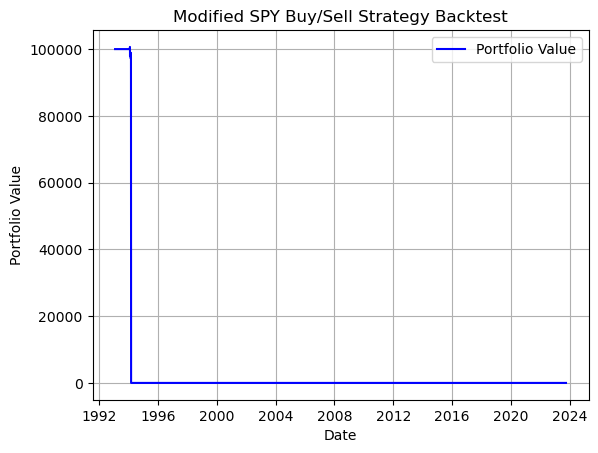

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical price data for SPY (S&P 500 ETF)
spyticker = yf.Ticker("SPY")
data = spyticker.history(period="max", interval="1d", start="1988-12-01", end="2024-01-01")

# Create a DataFrame from the SPY data
df = pd.DataFrame(data)
df.index = pd.to_datetime(df.index)  # Convert the index to datetime
df.index.name = 'Date'  # Set the name of the index to 'Date'

# Define a function to perform the modified backtest
def backtest_strategy(df):
    # Initial parameters
    initial_cash = 100000
    cash = initial_cash
    position = 0
    portfolio_value = []

    # Check the column names in the DataFrame
    if 'Close' in df.columns:
        close_column = 'Close'
    else:
        raise ValueError("No 'Close' column found in the DataFrame.")

    # Loop through the data
    for date, row in df.iterrows():
        # Check if it's the first day of the month
        if date.day == 1:
            # Calculate the date one year ago
            one_year_ago_date = date - pd.DateOffset(years=1)

            # Get the price one year ago (if available)
            if one_year_ago_date in df.index:
                price_one_year_ago = df.loc[one_year_ago_date, close_column]
            else:
                price_one_year_ago = row[close_column]  # Use current price if data is missing

            # Check if the price is higher than one year ago and make a decision
            if row[close_column] > price_one_year_ago:
                # Buy SPY
                position = cash / row[close_column]
                cash = 0
            else:
                # Sell SPY and go to cash
                cash += position * row[close_column]
                position = 0            
        # Calculate the total portfolio value at the end of each day
        total_value = cash + position * row[close_column]
        portfolio_value.append(total_value)

    return portfolio_value, cash

# Run the modified backtest with the SPY data
portfolio_value, final_cash = backtest_strategy(df)

# Print the final portfolio value and cash value
print(f"Final Portfolio Value for SPY: ${portfolio_value[-1]:,.2f}")
print(f"Final Cash Value: ${final_cash:,.2f}")

# Plot the portfolio value over time
plt.plot(df.index, portfolio_value, label='Portfolio Value', color='blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Modified SPY Buy/Sell Strategy Backtest')
plt.legend()
plt.grid(True)
plt.show()
